# Experiment 2: MLP Regression

In [1]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.metrics import plot_roc_curve
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../../data/energy/df.csv", )
df.head()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,energy,label,group
0,1054,32658,-16.064,-76.599,112.441,0.000,0.955,-0.296,35,28449.0,13.415,1,1
1,1054,32671,-16.208,-76.707,112.611,-0.719,0.415,0.558,24,28450.0,13.415,1,1
2,1053,32639,-16.064,-76.624,122.011,0.000,0.830,0.558,12,28450.0,13.415,1,1
3,1054,32670,-16.064,-76.624,112.611,0.000,0.830,0.558,54,28450.0,13.415,1,1
4,1054,32664,-15.968,-76.625,112.559,0.478,0.827,0.296,47,28451.0,13.415,1,1


# Holdout Set

In [4]:
np.random.seed(20)

remove_n = 20

drop_indices = np.random.choice(df.index, remove_n, replace=False)

hold_df = df.iloc[drop_indices]
df = df.drop(drop_indices)

# Define target and predictors

In [17]:
y = df['energy']

X = df[['pos_x', 'pos_y', 'pos_z','time']]

SKEW in Target Variable after BOXCOX TRANSFORMATION : 0.02421098639987086


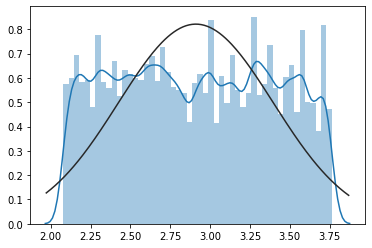

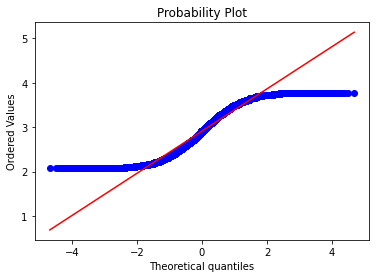

In [18]:
boxcox_y,_ = stats.boxcox(y)
boxcox_y = pd.Series(boxcox_y)
print("SKEW in Target Variable after BOXCOX TRANSFORMATION : {}".format(boxcox_y.skew()))

sns.distplot(boxcox_y , fit=stats.norm)
fig = plt.figure()
res = stats.probplot(boxcox_y,
                     dist=stats.norm,
                     plot=plt)

In [19]:
y = boxcox_y

# Split Dataset 

Dataset needs to be split into:
1. Main
    1. Train
    2. Test
2. Holdout for Testing on Unseen Data

Steps:
1. Identify Length of Dataset: `489906`
2. `90/10` Split for Main/Holdout Data
3. Save Last 10% as Holdout Data
    1. for `X`
    2. for `y`
4. Save first 90% as Main Data
    1. for `X`
    2. for `y`
5. `80/20` Train/Test Split on Main Data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [21]:
# # (1)
# df_len = len(df)

# # (2)
# main_len = int(round(0.9 * df_len))
# hold_len = df_len - main_len

# # (3)
# hold_X = X[-hold_len:]
# hold_y = y[-hold_len:]

# # (4)
# X.drop(X.tail(hold_len).index, inplace=True)
# y.drop(y.tail(hold_len).index, inplace=True) 

# # (5)
# train_len = int(round(0.8 * main_len))
# test_len = main_len - train_len

# # (6) Split the data into training/testing sets
# X_train = X[:-train_len]
# X_test = X[-test_len:]
# y_train = y[:-train_len]
# y_test = y[-test_len:]

print(" X TRAIN SHAPE: {} \n X TEST SHAPE: {} \n".format(X_train.shape, X_test.shape))
print(" Y TRAIN SHAPE: {} \n Y TEST SHAPE: {}".format(y_train.shape, y_test.shape))

 X TRAIN SHAPE: (367414, 4) 
 X TEST SHAPE: (122472, 4) 

 Y TRAIN SHAPE: (367414,) 
 Y TEST SHAPE: (122472,)


# Model

In [22]:
regr = MLPRegressor(hidden_layer_sizes=(200,),
                    activation='logistic',
                    solver='adam',
                    alpha=0.0001,
                    batch_size='auto',
                    learning_rate_init=0.001,
                    random_state=1,
                    max_iter=200,
                    verbose=True,
                    early_stopping=True)

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

Iteration 1, loss = 0.13012379
Validation score: -0.000165
Iteration 2, loss = 0.11829766
Validation score: -0.000563
Iteration 3, loss = 0.11836714
Validation score: -0.002113
Iteration 4, loss = 0.11827855
Validation score: -0.000174
Iteration 5, loss = 0.11828765
Validation score: -0.001099
Iteration 6, loss = 0.11827523
Validation score: -0.001902
Iteration 7, loss = 0.11817617
Validation score: -0.000438
Iteration 8, loss = 0.11857668
Validation score: -0.000831
Iteration 9, loss = 0.11799544
Validation score: -0.000730
Iteration 10, loss = 0.11901771
Validation score: -0.000682
Iteration 11, loss = 0.11839209
Validation score: -0.000716
Iteration 12, loss = 0.11860198
Validation score: -0.001586
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


# Results

In [23]:
regr.score(X_test, y_test)

-0.00031814423635712075

In [24]:
# print('Coefficients: \n {}'.format(regr.coefs_))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination (r2): %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 0.24
Coefficient of determination (r2): -0.00


In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(15,15))

ax1.scatter(X_test['pos_x'], y_test,  color='black')
ax1.plot(X_test['pos_x'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

ax2.scatter(X_test['pos_y'], y_test,  color='black')
ax2.plot(X_test['pos_y'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

ax3.scatter(X_test['pos_z'], y_test,  color='black')
ax3.plot(X_test['pos_z'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

ax4.scatter(X_test['time'], y_test,  color='black')
ax4.plot(X_test['time'], y_pred, color='blue', linewidth=3)

ax5.scatter(X_test['tot'], y_test,  color='black')
ax5.plot(X_test['tot'], y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

# Save Model

In [25]:
filename = 'finalized_mlp_model.sav'
pickle.dump(regr, open(filename, 'wb'))

# Unseen Data

In [26]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

-0.00031814423635712075


In [27]:
Xnew = hold_df[['pos_x',
               'pos_y',
               'pos_z',
               'time']]
hold_y = hold_df['energy']

ynew = loaded_model.predict(Xnew)

In [28]:
# for i in range(len(Xnew)):
#     print("Predicted Values: {} ".format(ynew[i]))

In [29]:
ynew[:5]

array([2.90187269, 2.90187269, 2.90187269, 2.90187269, 2.90187269])

In [30]:
hold_y[:5]

358818    20.061
159680    24.873
222390    14.403
437957    12.872
13266     42.506
Name: energy, dtype: float64

In [31]:
# print('Coefficients: \n {}'.format(loaded_model.coefs_))

print('Mean squared error: %.2f'
      % mean_squared_error(hold_y, ynew))

print('Coefficient of determination: %.2f'
      % r2_score(hold_y, ynew))

Mean squared error: 1150.56
Coefficient of determination: -1.92


# Results

# Tests

1. Hidden Layer = `100`
```
    Mean squared error: 0.46
    Coefficient of determination: -0.90
```

2. Hidden Layer = `200` **<---**
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

3. Hidden Layer = `500`
```
    Mean squared error: 0.25
    Coefficient of determination: -0.04
```

4. Hidden Layer = `300`
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```



#### Learning Rate

1. Learning Rate = `0.001` **<---**
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

2. Learning Rate = `0.0001`
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

2. Learning Rate = `0.01`
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

#### Activation

1. `Logistic` **<---**
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

2. `Identity`
```
    Mean squared error: 41637.82
    Coefficient of determination: -172321.32
```

3. `tanh` **<---**
``` 
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

4. `relu`
```
    Mean squared error: 4804.49
    Coefficient of determination: -19882.86
```

#### Optimiser

1. `adam` **<---**
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

2. `SGD` **<---**
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

#### Combinations

1. n=200, tanh, sgd, 0.001

```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

2. n=200, tanh, sgd, 0.0001
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

3. n=200, tanh, adam, 0.0001
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

4. n=200, tanh, adam, 0.01
```
    Mean squared error: 0.25
    Coefficient of determination: -0.05
```

5. n=200, tanh, sgd, 0.01
```
    Throws error
```

# Final Model Parameters:
1. hidden layers = 200
2. Optimiser = Adam
3. Loss = Logistic
4. Learning Rate = 0.001